# Exercise - Analyzing Data Science Job Demand

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_usa = df[df['job_country'] == 'United States'].copy()

In [4]:
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

In [5]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


In [6]:
df_us_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [7]:
df_us_pivot.reset_index(inplace=True)

In [8]:
df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,December,648,40,3979,2641,3472,119,601,689,752,212
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,May,279,20,4993,2976,4377,49,839,746,914,90
9,November,719,36,4531,2793,4175,132,656,684,816,194


In [9]:
df_us_pivot['month_no.'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot['month_no.']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no., dtype: int32

In [10]:
df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no.
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [11]:
df_us_pivot.sort_values(by='month_no.', inplace=True)
df_us_pivot.drop(labels='month_no.', axis=1, inplace=True)
df_us_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
0,April,565,40,6049,2801,4867,51,1025,781,991,112
8,May,279,20,4993,2976,4377,49,839,746,914,90
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
5,July,581,39,5201,2570,4876,65,883,747,1095,153
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
11,September,897,50,4639,3224,4568,113,805,775,1014,228
10,October,932,48,5271,3015,4882,101,871,672,987,219


In [12]:
df_us_pivot.set_index('job_posted_month',inplace=True)
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


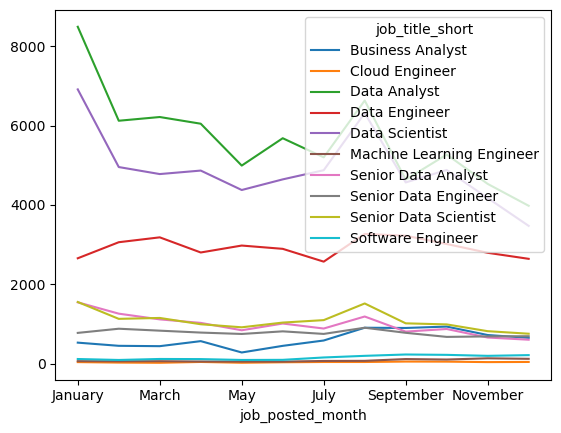

In [13]:
df_us_pivot.plot(kind='line')
plt.show()

In [14]:
top_3 = df_usa['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

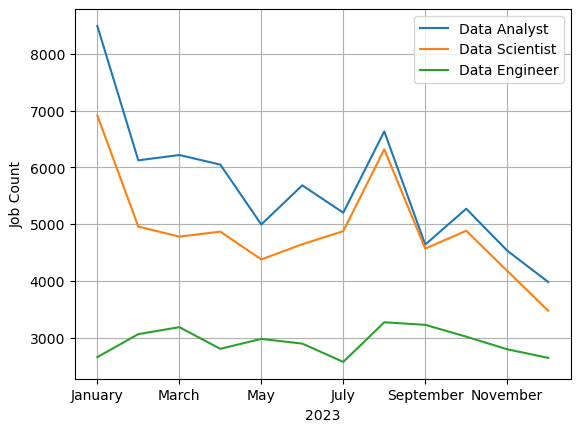

In [15]:
df_us_pivot[top_3].plot(kind='line')
plt.grid(True)
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

# Easier Method to Sort Months

In [21]:
df_india = df[df['job_country'] == 'India']
df_india['job_posted_month'] = pd.to_datetime(df_india['job_posted_date']).dt.to_period('M')
df_india_pivot = df_india.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_india_pivot

/var/folders/zm/92qn2sf553961xt_nm0z1fdc0000gn/T/ipykernel_7994/1087462496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['job_posted_month'] = pd.to_datetime(df_india['job_posted_date']).dt.to_period('M')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,175,31,628,2132,1444,70,127,448,269,192
2023-02,143,35,433,1631,932,42,94,313,165,157
2023-03,116,37,422,1591,1005,34,96,351,194,180
2023-04,170,32,418,1566,946,54,86,375,194,169
2023-05,103,14,278,1384,837,31,59,329,134,98
2023-06,146,26,367,1632,1129,41,66,427,238,125
2023-07,142,25,457,1528,1123,54,75,359,204,155
2023-08,189,25,618,1407,1157,47,126,343,235,148
2023-09,155,34,630,1508,984,67,85,324,195,132
